In [5]:
import librosa
import numpy as np

In [6]:
y1,sr1 = librosa.load('./datasetmini/audio-mixes/0001_mix.mp3')
y2,sr2 = librosa.load('./datasetmini/audio-mixes/0080_mix.mp3')

In [7]:
print(y1, len(y1), sr1)
print(y2, len(y2), sr2)

[-0.00077708  0.00042842  0.00400972 ...  0.          0.
  0.        ] 2705997 22050
[-2.3490041e-03 -1.0925442e-02  1.6372710e-02 ...  1.3825850e-04
  1.3563159e-04  8.4359315e-05] 2862117 22050


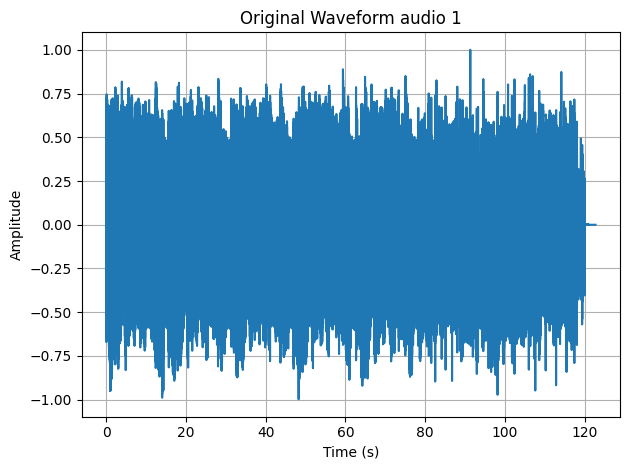

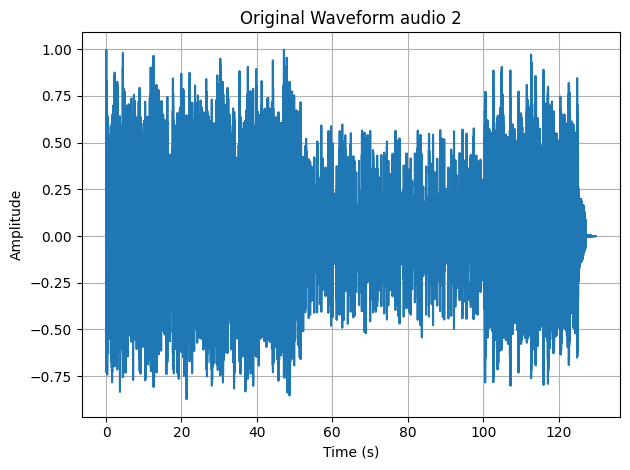

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, len(y1) / sr1, len(y1)), y1)
plt.title('Original Waveform audio 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(0, len(y2) / sr2, len(y2)), y2)
plt.title('Original Waveform audio 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

12 (12, 5286)


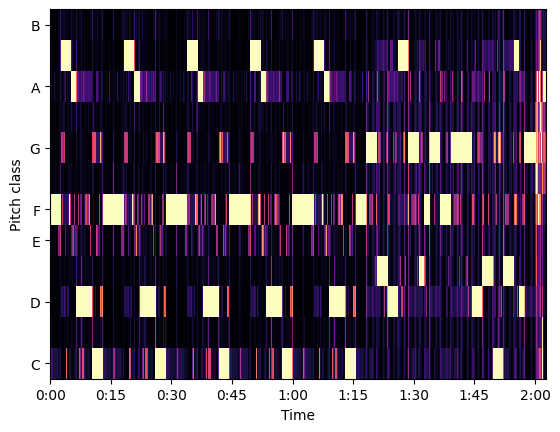

In [9]:
chroma1 = librosa.feature.chroma_cqt(y=y1, sr=sr1)
print(len(chroma1), chroma1.shape)
librosa.display.specshow(chroma1, y_axis='chroma', x_axis='time')


12 (12, 5591)


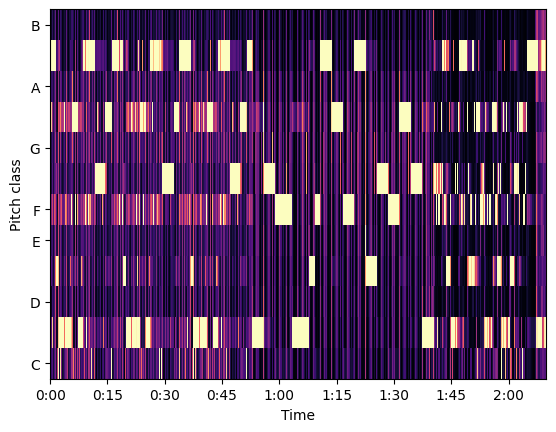

In [10]:

chroma2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)
print(len(chroma2), chroma2.shape)
librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', )

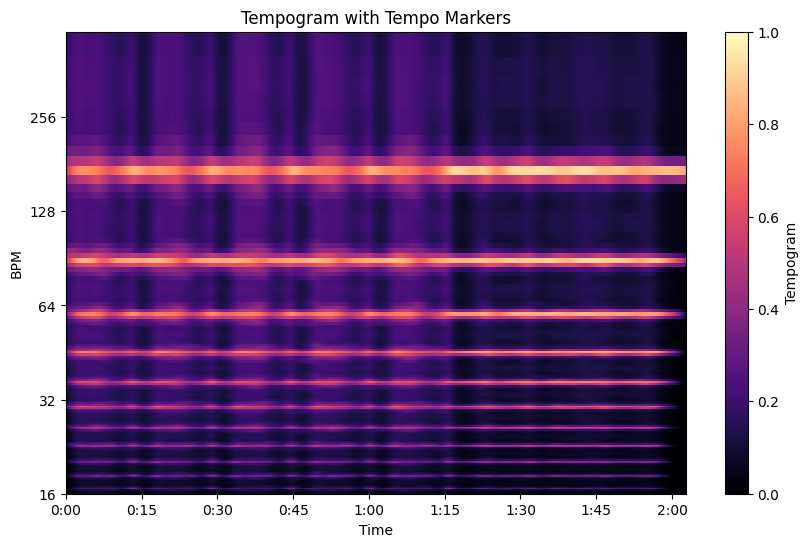

In [11]:
onset_env = librosa.onset.onset_strength(y=y1, sr=sr1)
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr1)

# Plot the tempogram with tempo markers
plt.figure(figsize=(10, 6))
librosa.display.specshow(tempogram, sr=sr1, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma')
plt.colorbar(label='Tempogram')
plt.title('Tempogram with Tempo Markers')
plt.show()

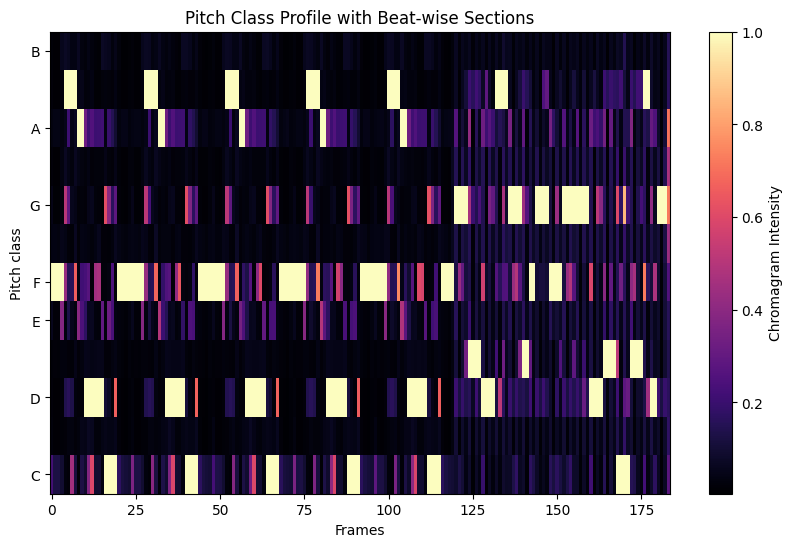

In [12]:

tempo, beat_frames = librosa.beat.beat_track(y=y1, sr=sr1)

#Sync chroma to beat frames
chroma_sync = librosa.util.sync(chroma1, beat_frames, aggregate=np.median)

# Plot the sync chromagram
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma_sync, x_axis='frames', y_axis='chroma', sr=sr1, hop_length=512)
plt.title('Pitch Class Profile with Beat-wise Sections')
plt.colorbar(label='Chromagram Intensity')
plt.show()

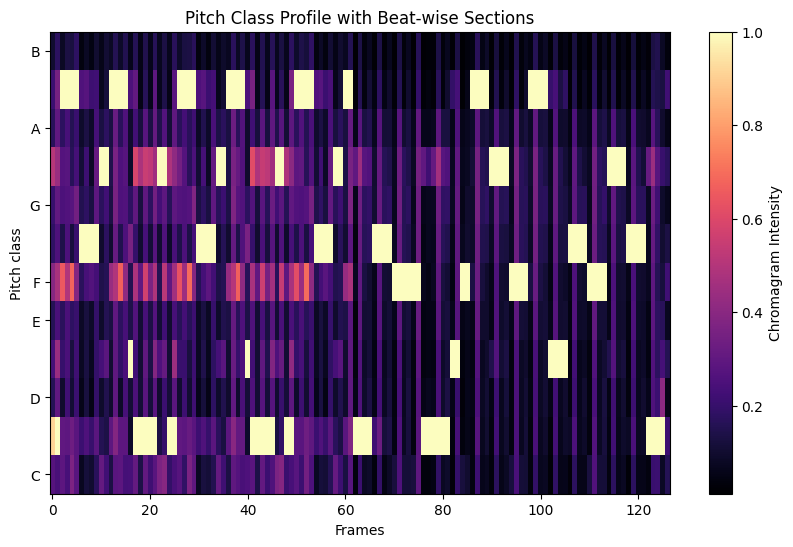

In [13]:
tempo, beat_frames = librosa.beat.beat_track(y=y2, sr=sr2)
chroma_sync = librosa.util.sync(chroma2, beat_frames, aggregate=np.median)
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma_sync, x_axis='frames', y_axis='chroma', sr=sr2, hop_length=512)
plt.title('Pitch Class Profile with Beat-wise Sections')
plt.colorbar(label='Chromagram Intensity')
plt.show()

In [14]:
print(chroma_sync, chroma_sync.shape, len(chroma_sync))

[[0.27166873 0.24022299 0.2895904  ... 0.21115215 0.0793623  0.15930593]
 [0.91207933 1.         0.30041856 ... 1.         1.         0.21613976]
 [0.16160777 0.30133086 0.09461838 ... 0.21128026 0.4028648  0.05144418]
 ...
 [0.17016457 0.29894415 0.1742911  ... 0.16649432 0.09650882 0.05251966]
 [0.20939794 0.35074013 1.         ... 0.14119187 0.12858394 0.22047754]
 [0.09762777 0.17559141 0.07811941 ... 0.14923143 0.08103536 0.03797071]] (12, 127) 12


why not keep frame training only? why to extend the training for the whole song. 
so model only trains on 1 frame, which is a 12 vector and outputs a 24 vector. 
model doesnt need to know that a song exists in reality. it will only deal with frame long descriptions of the audio and produce whatever is the highest probability of chord vector.
we need a script to generate all frames and feed it into the machine one by one

In [25]:
import csv

beat_times = []
chords = []

with open('./datasetmini/annotations/0080_beatinfo.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        beat_times.append(float(row[0]))
        chords.append(row[3].strip("'"))

print("beat_times:", beat_times)
print("chords:", chords)
print(len(beat_times))

beat_times: [0.0, 0.36809817, 0.73619634, 1.1042945, 1.4723927, 1.8404908, 2.208589, 2.576687, 2.9447854, 3.3128836, 3.6809816, 4.04908, 4.417178, 4.7852764, 5.153374, 5.5214725, 5.8895707, 6.257669, 6.625767, 6.993865, 7.3619633, 7.7300615, 8.09816, 8.466258, 8.834356, 9.202455, 9.570553, 9.93865, 10.306748, 10.674847, 11.042945, 11.411043, 11.779141, 12.14724, 12.515338, 12.883436, 13.251534, 13.619633, 13.98773, 14.355828, 14.723927, 15.092025, 15.460123, 15.828221, 16.19632, 16.564417, 16.932516, 17.300613, 17.66871, 18.036808, 18.404907, 18.773005, 19.141104, 19.509201, 19.8773, 20.245398, 20.613497, 20.981594, 21.349693, 21.71779, 22.085888, 22.453987, 22.822084, 23.190184, 23.55828, 23.92638, 24.294477, 24.662575, 25.030674, 25.398773, 25.76687, 26.134968, 26.503067, 26.871166, 27.239264, 27.60736, 27.97546, 28.343557, 28.711655, 29.079754, 29.447853, 29.81595, 30.184048, 30.552147, 30.920246, 31.288343, 31.65644, 32.02454, 32.39264, 32.760735, 33.128834, 33.496933, 33.86503, 34

In [28]:

beat_times_array = np.array(beat_times)
beat_frames = librosa.time_to_frames(beat_times, sr=sr1)
chroma_sync = librosa.util.sync(chroma1, beat_frames, aggregate=np.median)
print(chroma_sync.shape)

(12, 249)


We have corresponding chroma vectors for all frames of the song! 

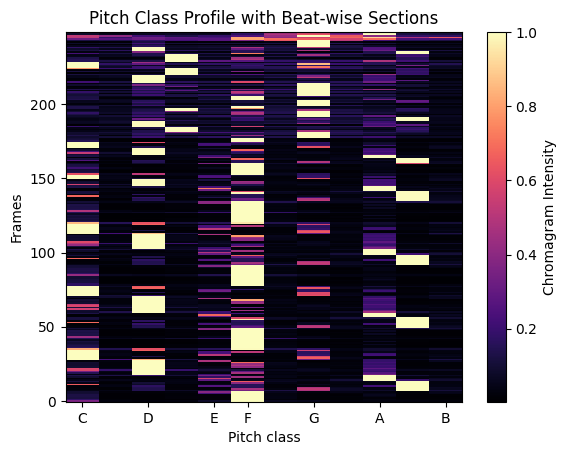

In [34]:
librosa.display.specshow(chroma_sync.transpose(),\
                        x_axis='chroma', y_axis='frames', \
                        sr=sr1, hop_length=512)
plt.title('Pitch Class Profile with Beat-wise Sections')
plt.colorbar(label='Chromagram Intensity')
plt.show()


In [37]:
print(chroma_sync.transpose()[0].shape)
chroma_sync.transpose()[0]

(12,)


array([0.36041299, 0.03054849, 0.02921543, 0.03117784, 0.08273622,
       1.        , 0.063772  , 0.05651116, 0.02746752, 0.03348775,
       0.03088865, 0.02276362], dtype=float32)